In [1]:
#加载飞桨和相关类库
import paddle
from paddle.nn import Linear
import paddle.nn.functional as F
import os
import numpy as np
import matplotlib.pyplot as plt

d:\python高级程序设计\.venv\lib\site-packages\matplotlib_inline\config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


In [2]:
# 设置数据格式
paddle.vision.set_image_backend('cv2')
train_dataset = paddle.vision.MNIST(mode='train')

len(train_dataset)

60000

[5]


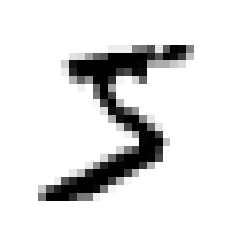

In [12]:
plt.imshow(train_dataset[0][0],cmap='binary')
plt.axis('off')
print(train_dataset[0][1])

In [4]:
# 模型设计，定义假设空间
class  MINIST(paddle.nn.Layer):
    def __init__(self) -> None:
        super(MINIST,self).__init__()

        self.fc = paddle.nn.Linear(in_features=784,out_features=1)
    
    def forward(self,inputs):
        predict  =  self.fc(inputs)
        return predict

In [5]:
# 数据归一化处理
def norm_img(img):
    assert len(img.shape) == 3

    img = img/225

    img  = paddle.reshape(img,[-1,784])

    return img

In [6]:
data_loader = paddle.io.DataLoader(
    train_dataset,#数据源
    batch_size = 16,# 每次训练的样本大小
    shuffle = True #样本顺序打乱
)

In [7]:
#定义训练过程
model = MINIST()

iter_num = 0
all_iter = []
all_loss = []
def train(model):
    model.train()

    #定义优化器
    opt = paddle.optimizer.SGD(learning_rate=0.001,parameters=model.parameters())

    # 定义输入
    data_loader = paddle.io.DataLoader(
        train_dataset,#数据源
        batch_size = 16,# 每次训练的样本大小
        shuffle = True #样本顺序打乱
    )

    epoch_num = 10
    for i in range(epoch_num):
        for batch_id,data in enumerate(data_loader):
            img = norm_img(data[0]).astype('float32')
            label  = data[1].astype('float32')
            global iter_num
            all_iter.append(iter_num)
            iter_num += 1

            predict = model.forward(img)

            loss = F.square_error_cost(predict,label=label)
            avg_loss = paddle.mean(loss)
            all_loss.append(avg_loss.numpy()[0])

            # 反向计算
            avg_loss.backward()
            opt.step()
            opt.clear_grad()

            if batch_id % 100 ==0:
                print('epoch is {}, batch_id is {} ,loss is {}, '.format(i,batch_id,avg_loss.numpy()))
    

In [8]:
model = MINIST()
train(model)


epoch is 0, batch_id is 0 ,loss is [26.537415], 
epoch is 0, batch_id is 100 ,loss is [6.984982], 
epoch is 0, batch_id is 200 ,loss is [5.7257037], 
epoch is 0, batch_id is 300 ,loss is [3.4913542], 
epoch is 0, batch_id is 400 ,loss is [4.8942275], 
epoch is 0, batch_id is 500 ,loss is [4.67894], 
epoch is 0, batch_id is 600 ,loss is [4.384933], 
epoch is 0, batch_id is 700 ,loss is [5.5107174], 
epoch is 0, batch_id is 800 ,loss is [5.5378904], 
epoch is 0, batch_id is 900 ,loss is [4.455756], 
epoch is 0, batch_id is 1000 ,loss is [5.96354], 
epoch is 0, batch_id is 1100 ,loss is [5.0181923], 
epoch is 0, batch_id is 1200 ,loss is [3.397202], 
epoch is 0, batch_id is 1300 ,loss is [6.4146233], 
epoch is 0, batch_id is 1400 ,loss is [2.8140035], 
epoch is 0, batch_id is 1500 ,loss is [3.1082387], 
epoch is 0, batch_id is 1600 ,loss is [3.5628386], 
epoch is 0, batch_id is 1700 ,loss is [3.7949479], 
epoch is 0, batch_id is 1800 ,loss is [2.9563012], 
epoch is 0, batch_id is 1900 ,lo

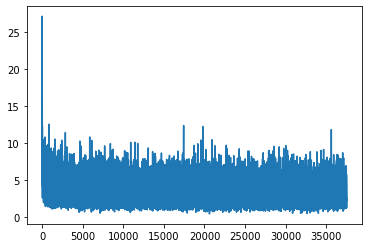

In [9]:
plt.plot(all_iter,all_loss)

In [11]:
model_file_path = './models/minist.pdparams'
paddle.save(model.state_dict(),model_file_path)

<PIL.JpegImagePlugin.JpegImageFile image mode=L size=28x28 at 0x1683AAED3A0>


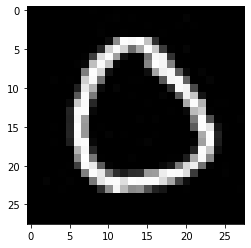

In [13]:
from PIL import Image

im_path = './work/example_0.jpg'
im = Image.open(im_path)
print(im)
plt.imshow(im,cmap='binary')

In [18]:
# 定义转换函数
def load_img(img_path):
    im = Image.open(img_path)
    im = im.resize((28,28),Image.ANTIALIAS)# 转换为 28*28的图片
    plt.imshow(im,cmap='binary')
    im = np.array(im).reshape(1,-1).astype('float32')

    im = 1 - im/255 # 原来的数字部分是白色的，减去以后直接黑变白，白变黑
    
    return im

[[1]]


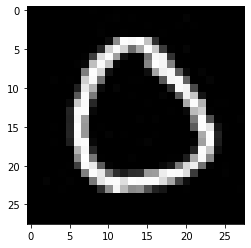

In [19]:
model = MINIST()
para_dict = paddle.load(model_file_path)
model.load_dict(para_dict)

model.eval()#启动预测模式
tensor_img = load_img(img_path=im_path)
result = model(paddle.to_tensor(tensor_img))
print(result.numpy().astype(np.int32))

In [8]:
import numpy as np
import paddle
from paddle.nn import BatchNorm1D

data = np.array(
    [[1,2,3],[4,5,6],[7,8,9]]
).astype(np.float32)

bn = BatchNorm1D(num_features=3)

x = paddle.to_tensor(data)
y = bn(x)

print(y.numpy())

a = np.array([1,4,7])
a_mean = a.mean()
a_std = a.std()
b = (a - a_mean) / a_std
print('std {}, mean {}, \n output {}'.format(a_mean, a_std, b))

[[-1.2247438 -1.2247438 -1.2247438]
 [ 0.         0.         0.       ]
 [ 1.2247438  1.2247438  1.2247438]]
std 4.0, mean 2.449489742783178, 
 output [-1.22474487  0.          1.22474487]
